# 텍스트빈도분석 - 1.영어단어분석

### 영어 단어 분석에 필요한 패키지 준비

In [6]:
!pip install matplotlib  

Defaulting to user installation because normal site-packages is not writeable


In [7]:
!pip install wordcloud  

Defaulting to user installation because normal site-packages is not writeable


In [8]:
import pandas as pd
import glob
import re
from functools import reduce

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [9]:
import nltk     # nltk.download() 를 하기위해, import 함.

#### - 아나콘다에 nltk 가 기본으로 설치되어있으므로, pip으로 설치할 필요없음.
####    하지만, 최초 한번은 nltk의 리소스를 다운로드 받아야함.

In [10]:
nltk.download()  # 최초 한번만 설치: download 창이 뜨면, 모두 선택하고 [Download] 버튼 클릭!

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

# 1. 데이터 준비

### 1-1. 파일 병합

### - ☺데이터를 다운 받은 시점에 따라 검색결과가 달라지므로, 결과 화면이 다를수 있습니다.☺ -

In [11]:
all_files = glob.glob('myCabinetExcelData*.xls')

all_files #출력하여 내용 확인

['myCabinetExcelData (1).xls',
 'myCabinetExcelData (2).xls',
 'myCabinetExcelData (3).xls',
 'myCabinetExcelData (4).xls',
 'myCabinetExcelData (5).xls',
 'myCabinetExcelData (6).xls',
 'myCabinetExcelData (7).xls',
 'myCabinetExcelData (8).xls',
 'myCabinetExcelData (9).xls',
 'myCabinetExcelData.xls']

In [12]:
all_files_data = [] #저장할 리스트 

for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)

all_files_data[0] #출력하여 내용 확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Agile Big Data Analytics for Web-Based Systems...,"Chen, H.; Kazman, R.; Haziyev, S.",unknown,2016
1,NaN,2,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2017
2,NaN,3,Architecting Time-Critical Big-Data Systems,"Basanta-Val, P.; Audsley, N. C.; Wellings, A. ...",unknown,2016
3,NaN,4,Guest Editorial: Big Data Infrastructure I,"Chen, J.; Wang, H.",unknown,2018
4,NaN,5,Speed Up Big Data Analytics by Unveiling the S...,"Wang, J.; Zhang, X.; Yin, J.; Wang, R.; Wu, H....",unknown,2018
...,...,...,...,...,...,...
95,NaN,96,Automated Data Slicing for Model Validation: A...,"Chung, Yeounoh; Kraska, Tim; Polyzotis, Neokli...",IEEE INSTITUTE OF ELECTRICAL AND ELECTRONICS,2020
96,NaN,97,Flexible Heavy Tailed Distributions for Big Data,"Zhang, Y.; Nadarajah, S.",Springer Science + Business Media,2017
97,NaN,98,How China Deals with Big Data,"Shi, Y.; Shan, Z.; Li, J.; Fang, Y.",Springer Science + Business Media,2017
98,NaN,99,A Scalable Multi-Data Sources Based Recursive ...,"Yang, Chi; Xu, Xianghua; Ramamohanarao, Kotagi...",IEEE INSTITUTE OF ELECTRICAL AND ELECTRONICS,2020


In [13]:
all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index=True)

all_files_data_concat #출력하여 내용 확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Agile Big Data Analytics for Web-Based Systems...,"Chen, H.; Kazman, R.; Haziyev, S.",unknown,2016
1,NaN,2,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2017
2,NaN,3,Architecting Time-Critical Big-Data Systems,"Basanta-Val, P.; Audsley, N. C.; Wellings, A. ...",unknown,2016
3,NaN,4,Guest Editorial: Big Data Infrastructure I,"Chen, J.; Wang, H.",unknown,2018
4,NaN,5,Speed Up Big Data Analytics by Unveiling the S...,"Wang, J.; Zhang, X.; Yin, J.; Wang, R.; Wu, H....",unknown,2018
...,...,...,...,...,...,...
995,NaN,96,Improved big data stock index prediction using...,"Eapen, Jithin; Verma, Abhishek; Bein, Doina",Inderscience,2021
996,NaN,97,A big data-based RF localisation method for un...,"Wang, Ju; Liu, Hongzhe; Bao, Hong; Montoya, Ce...",Inderscience,2018
997,NaN,98,Intelligent big data analysis: a review,"Tsai, Chun-Wei; Yang, Ya-Lan; Chiang, Ming-Cha...",Inderscience,2014
998,NaN,99,Health big data analytics: current perspective...,"Kuo, Mu-Hsing; Sahama, Tony; Kushniruk, Andre ...",Inderscience,2014


In [14]:
all_files_data_concat.to_csv('riss_bigdata.csv', encoding='utf-8', index = False)

### 1-2. 데이터 전처리 (Pre-processing)

In [15]:
# 제목 추출
all_title = all_files_data_concat['제목']

all_title #출력하여 내용 확인

0      Agile Big Data Analytics for Web-Based Systems...
1      Guest Editorial: Big Scholar Data Discovery an...
2            Architecting Time-Critical Big-Data Systems
3             Guest Editorial: Big Data Infrastructure I
4      Speed Up Big Data Analytics by Unveiling the S...
                             ...                        
995    Improved big data stock index prediction using...
996    A big data-based RF localisation method for un...
997              Intelligent big data analysis: a review
998    Health big data analytics: current perspective...
999    Analyzing Big Smart Metering Data Towards Diff...
Name: 제목, Length: 1000, dtype: object

In [16]:
stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

In [17]:
words = []  

for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title))    
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)

In [18]:
print(words)  #출력하여 내용 확인

[['agile', 'big', 'data', 'analytics', 'web', 'based', 'system', 'architecture', 'centric', 'approach'], ['guest', 'editorial', 'big', 'scholar', 'data', 'discovery', 'collaboration'], ['architecting', 'time', 'critical', 'big', 'data', 'system'], ['guest', 'editorial', 'big', 'data', 'infrastructure'], ['speed', 'big', 'data', 'analytics', 'unveiling', 'storage', 'distribution', 'sub', 'datasets'], ['guest', 'editorial', 'big', 'scholar', 'data', 'discovery', 'collaboration'], ['guest', 'editorial', 'big', 'medium', 'data', 'understanding', 'search', 'mining'], ['guest', 'editorial', 'big', 'data', 'analytics', 'web'], ['guest', 'editorial', 'big', 'medium', 'data', 'understanding', 'search', 'mining', 'part'], ['guest', 'editorial', 'big', 'medium', 'data', 'understanding', 'search', 'mining'], ['guest', 'editorial', 'big', 'data', 'analytics', 'web'], ['online', 'similarity', 'learning', 'big', 'data', 'overfitting'], ['nosql', 'database', 'big', 'data'], ['current', 'trend', 'predi

In [19]:
words2 = list(reduce(lambda x, y: x+y,words))
print(words2)  #작업 내용 확인

['agile', 'big', 'data', 'analytics', 'web', 'based', 'system', 'architecture', 'centric', 'approach', 'guest', 'editorial', 'big', 'scholar', 'data', 'discovery', 'collaboration', 'architecting', 'time', 'critical', 'big', 'data', 'system', 'guest', 'editorial', 'big', 'data', 'infrastructure', 'speed', 'big', 'data', 'analytics', 'unveiling', 'storage', 'distribution', 'sub', 'datasets', 'guest', 'editorial', 'big', 'scholar', 'data', 'discovery', 'collaboration', 'guest', 'editorial', 'big', 'medium', 'data', 'understanding', 'search', 'mining', 'guest', 'editorial', 'big', 'data', 'analytics', 'web', 'guest', 'editorial', 'big', 'medium', 'data', 'understanding', 'search', 'mining', 'part', 'guest', 'editorial', 'big', 'medium', 'data', 'understanding', 'search', 'mining', 'guest', 'editorial', 'big', 'data', 'analytics', 'web', 'online', 'similarity', 'learning', 'big', 'data', 'overfitting', 'nosql', 'database', 'big', 'data', 'current', 'trend', 'predictive', 'analytics', 'big',

# 2. 데이터 탐색

## 2-1. 단어 빈도 탐색

In [20]:
count = Counter(words2)

count   #출력하여 내용 확인

Counter({'agile': 2,
         'big': 1338,
         'data': 1532,
         'analytics': 149,
         'web': 14,
         'based': 60,
         'system': 58,
         'architecture': 12,
         'centric': 3,
         'approach': 48,
         'guest': 19,
         'editorial': 22,
         'scholar': 6,
         'discovery': 15,
         'collaboration': 9,
         'architecting': 3,
         'time': 17,
         'critical': 6,
         'infrastructure': 13,
         'speed': 2,
         'unveiling': 2,
         'storage': 20,
         'distribution': 10,
         'sub': 2,
         'datasets': 6,
         'medium': 15,
         'understanding': 14,
         'search': 10,
         'mining': 43,
         'part': 2,
         'online': 9,
         'similarity': 3,
         'learning': 32,
         'overfitting': 2,
         'nosql': 4,
         'database': 11,
         'current': 7,
         'trend': 8,
         'predictive': 13,
         'structural': 3,
         'balance': 2,
        

In [21]:
word_count = dict()

for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

data : 1532
big : 1338
analytics : 149
analysis : 63
based : 60
system : 58
using : 52
management : 50
approach : 48
model : 48
mining : 43
challenge : 40
science : 39
new : 37
processing : 35
health : 34
learning : 32
smart : 31
cloud : 31
knowledge : 30
research : 30
framework : 29
opportunity : 28
distributed : 26
computing : 26
driven : 25
review : 25
service : 25
small : 25
quality : 24
efficient : 23
platform : 23
issue : 23
technology : 23
editorial : 22
survey : 22
privacy : 22
storage : 20
business : 20
perspective : 20
deal : 20
earth : 20
guest : 19
healthcare : 19
application : 19
large : 18
social : 18
network : 18
care : 18
use : 18


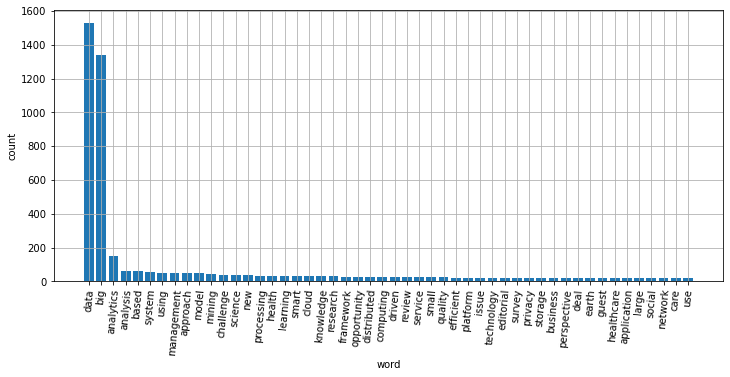

In [22]:
# 히스토그램 표시 옵션 
plt.figure(figsize=(12,5))
plt.xlabel("word")
plt.ylabel("count")
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='85')

plt.show()

#### 여기서 잠깐!! : 검색어로 사용한 big'과 'data' 빈도가 압도적으로 많으므로, 이를 제거한다.

In [23]:
#검색어로 사용한 'big'과 'data' 항목 제거 하기
del word_count['big']
del word_count['data']

## 2-2 단어 빈도 히스토그램

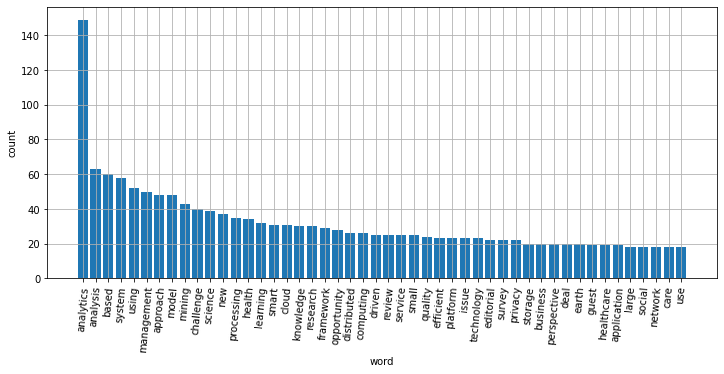

In [24]:
# 히스토그램 표시 옵션 
plt.figure(figsize=(12,5))
plt.xlabel("word")
plt.ylabel("count")
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='85')

plt.show()

# 3. 분석 모델 구축 및 결과 시각화

## 3-1. 연도별 데이터 수

In [25]:
all_files_data_concat['doc_count'] = 0
summary_year = all_files_data_concat.groupby('출판일', as_index=False)['doc_count'].count()
summary_year  #출력하여 내용 확인

,출판일,doc_count
0,1994,1
1,1995,1
2,2002,2
3,2003,1
4,2004,4
5,2005,5
6,2007,4
7,2008,4
8,2010,3
9,2011,7


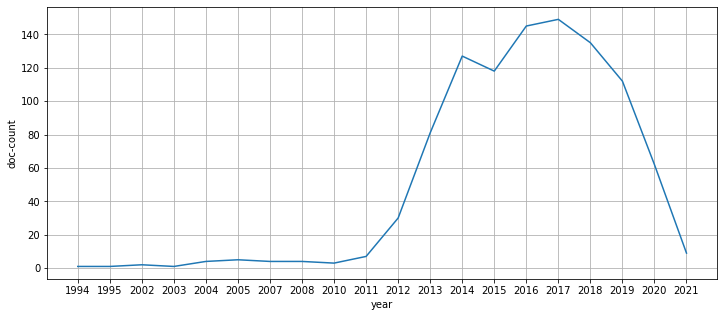

In [26]:
plt.figure(figsize=(12,5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)

plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])

plt.show()

## 3-2. 워드클라우드

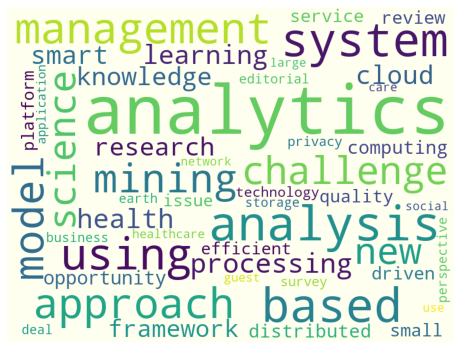

In [27]:
stopwords=set(STOPWORDS)
wc=WordCloud(background_color='ivory', stopwords=stopwords, width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

#### - 워드 클라우드에 나타나는 단어의 위치는 실행 할 때마다 달라진다. ☺

In [29]:
cloud.to_file("riss_bigdata_wordCloud.jpg")